## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import baselineModels
import scrapbook as sb 
import torch 
import statsModel
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 
### Boston Dataset 

In [3]:
X,Y = bostonDataset.boston_data()
n_features = 13 
n_samples = 506 
n_target = 1 

        X1    X2    X3   X4     X5     X6    X7      X8   X9    X10   X11  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

      X12   X13     Y  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 

No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      Y   R-squared (uncentered):                   0.761
Model:                            OLS   Adj. R-squared (uncentered):              0.753
Method:                 Least Squares   F-statistic:                              95.52
Date:                Sat, 27 Nov 2021   Prob (F-statistic):                   1.49e-112
Time:                        10:45:44   Log-Likelihood:                         -277.37
No. Observations:                 404   AIC:                                      580.7
Df Residuals:                     391   BIC:                                      632.8
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

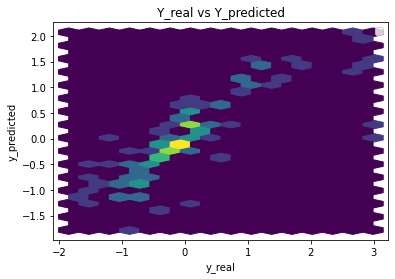

Performance Metrics
Mean Squared Error: 0.37928272221982323
Mean Absolute Error: 0.37307098486348295
Manhattan distance: 38.05324045607526
Euclidean distance: 6.2198744092161515


In [5]:
[coeff,y_pred] = statsModel.statsModel(X,Y)

#Store Coefficients 
sb.glue("Coefficients",coeff)

## Random Forest 

In [6]:
mse_rf = baselineModels.randomForest(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Random Forest MSE",mse_rf)

Mean Squared error 0.121724236990994


## Catboost 



In [7]:
mse_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Catboost MSE",mse_cb)

Learning rate set to 0.033215


0:	learn: 1.0107022	total: 58.7ms	remaining: 58.6s
1:	learn: 0.9918949	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9701305	total: 61.1ms	remaining: 20.3s
3:	learn: 0.9557086	total: 62.2ms	remaining: 15.5s
4:	learn: 0.9359617	total: 63.3ms	remaining: 12.6s
5:	learn: 0.9182251	total: 64.3ms	remaining: 10.7s
6:	learn: 0.9017356	total: 65.5ms	remaining: 9.29s
7:	learn: 0.8840367	total: 66.5ms	remaining: 8.25s
8:	learn: 0.8673132	total: 67.6ms	remaining: 7.44s
9:	learn: 0.8501102	total: 68.6ms	remaining: 6.79s
10:	learn: 0.8365506	total: 69.6ms	remaining: 6.26s
11:	learn: 0.8222644	total: 70.6ms	remaining: 5.81s
12:	learn: 0.8067451	total: 71.6ms	remaining: 5.44s
13:	learn: 0.7915117	total: 72.7ms	remaining: 5.12s
14:	learn: 0.7790925	total: 73.7ms	remaining: 4.84s
15:	learn: 0.7660850	total: 74.7ms	remaining: 4.59s
16:	learn: 0.7545125	total: 75.8ms	remaining: 4.38s
17:	learn: 0.7430117	total: 76.6ms	remaining: 4.18s
18:	learn: 0.7299540	total: 77.6ms	remaining: 4s
19:	learn: 0.7154549	tota

103:	learn: 0.3117852	total: 159ms	remaining: 1.37s
104:	learn: 0.3100152	total: 160ms	remaining: 1.36s
105:	learn: 0.3082936	total: 161ms	remaining: 1.36s
106:	learn: 0.3065826	total: 162ms	remaining: 1.35s
107:	learn: 0.3047272	total: 163ms	remaining: 1.35s
108:	learn: 0.3027806	total: 164ms	remaining: 1.34s
109:	learn: 0.3017728	total: 165ms	remaining: 1.33s
110:	learn: 0.3000588	total: 166ms	remaining: 1.33s
111:	learn: 0.2983296	total: 167ms	remaining: 1.32s
112:	learn: 0.2962586	total: 168ms	remaining: 1.32s
113:	learn: 0.2949840	total: 169ms	remaining: 1.31s
114:	learn: 0.2936284	total: 170ms	remaining: 1.31s
115:	learn: 0.2925566	total: 171ms	remaining: 1.3s
116:	learn: 0.2910190	total: 172ms	remaining: 1.3s
117:	learn: 0.2891255	total: 173ms	remaining: 1.29s
118:	learn: 0.2880266	total: 174ms	remaining: 1.29s
119:	learn: 0.2872378	total: 175ms	remaining: 1.28s
120:	learn: 0.2859553	total: 176ms	remaining: 1.28s
121:	learn: 0.2850685	total: 177ms	remaining: 1.27s
122:	learn: 0.

136:	learn: 0.2687735	total: 192ms	remaining: 1.21s
137:	learn: 0.2674614	total: 193ms	remaining: 1.21s
138:	learn: 0.2658660	total: 194ms	remaining: 1.2s
139:	learn: 0.2649843	total: 195ms	remaining: 1.2s
140:	learn: 0.2642121	total: 196ms	remaining: 1.19s
141:	learn: 0.2633935	total: 197ms	remaining: 1.19s
142:	learn: 0.2626823	total: 198ms	remaining: 1.19s
143:	learn: 0.2614209	total: 199ms	remaining: 1.18s
144:	learn: 0.2606432	total: 200ms	remaining: 1.18s
145:	learn: 0.2597031	total: 201ms	remaining: 1.18s
146:	learn: 0.2590174	total: 202ms	remaining: 1.17s
147:	learn: 0.2578090	total: 203ms	remaining: 1.17s
148:	learn: 0.2570570	total: 204ms	remaining: 1.16s
149:	learn: 0.2566074	total: 205ms	remaining: 1.16s
150:	learn: 0.2555552	total: 206ms	remaining: 1.16s
151:	learn: 0.2545942	total: 207ms	remaining: 1.15s
152:	learn: 0.2538871	total: 208ms	remaining: 1.15s
153:	learn: 0.2529668	total: 209ms	remaining: 1.15s
154:	learn: 0.2519692	total: 210ms	remaining: 1.14s
155:	learn: 0.

194:	learn: 0.2218380	total: 249ms	remaining: 1.03s
195:	learn: 0.2212846	total: 250ms	remaining: 1.02s
196:	learn: 0.2207642	total: 251ms	remaining: 1.02s
197:	learn: 0.2200681	total: 252ms	remaining: 1.02s
198:	learn: 0.2194211	total: 253ms	remaining: 1.02s
199:	learn: 0.2188422	total: 254ms	remaining: 1.02s
200:	learn: 0.2184332	total: 255ms	remaining: 1.01s
201:	learn: 0.2177448	total: 256ms	remaining: 1.01s
202:	learn: 0.2174070	total: 257ms	remaining: 1.01s
203:	learn: 0.2165435	total: 258ms	remaining: 1.01s
204:	learn: 0.2158603	total: 259ms	remaining: 1s
205:	learn: 0.2151204	total: 260ms	remaining: 1s
206:	learn: 0.2144425	total: 261ms	remaining: 1s
207:	learn: 0.2141165	total: 262ms	remaining: 998ms
208:	learn: 0.2136974	total: 263ms	remaining: 996ms
209:	learn: 0.2131075	total: 264ms	remaining: 994ms
210:	learn: 0.2123676	total: 265ms	remaining: 992ms
211:	learn: 0.2119458	total: 266ms	remaining: 990ms
212:	learn: 0.2110856	total: 267ms	remaining: 988ms
213:	learn: 0.2105968

298:	learn: 0.1728824	total: 349ms	remaining: 818ms
299:	learn: 0.1724438	total: 350ms	remaining: 817ms
300:	learn: 0.1720096	total: 352ms	remaining: 817ms
301:	learn: 0.1717236	total: 353ms	remaining: 815ms
302:	learn: 0.1714531	total: 354ms	remaining: 813ms
303:	learn: 0.1713018	total: 354ms	remaining: 811ms
304:	learn: 0.1708850	total: 355ms	remaining: 810ms
305:	learn: 0.1705030	total: 356ms	remaining: 808ms
306:	learn: 0.1700733	total: 357ms	remaining: 806ms
307:	learn: 0.1696935	total: 358ms	remaining: 805ms
308:	learn: 0.1693494	total: 359ms	remaining: 803ms
309:	learn: 0.1691214	total: 360ms	remaining: 801ms
310:	learn: 0.1688624	total: 361ms	remaining: 799ms
311:	learn: 0.1685253	total: 361ms	remaining: 797ms
312:	learn: 0.1681609	total: 362ms	remaining: 795ms
313:	learn: 0.1679302	total: 363ms	remaining: 793ms
314:	learn: 0.1675653	total: 364ms	remaining: 791ms
315:	learn: 0.1670731	total: 365ms	remaining: 789ms
316:	learn: 0.1665675	total: 366ms	remaining: 788ms
317:	learn: 

334:	learn: 0.1602112	total: 381ms	remaining: 756ms
335:	learn: 0.1599115	total: 382ms	remaining: 755ms
336:	learn: 0.1594645	total: 383ms	remaining: 753ms
337:	learn: 0.1591033	total: 384ms	remaining: 751ms
338:	learn: 0.1588833	total: 384ms	remaining: 750ms
339:	learn: 0.1584946	total: 385ms	remaining: 748ms
340:	learn: 0.1581981	total: 386ms	remaining: 746ms
341:	learn: 0.1580503	total: 387ms	remaining: 745ms
342:	learn: 0.1576762	total: 388ms	remaining: 743ms
343:	learn: 0.1575325	total: 389ms	remaining: 741ms
344:	learn: 0.1574009	total: 390ms	remaining: 740ms
345:	learn: 0.1571252	total: 390ms	remaining: 738ms
346:	learn: 0.1569644	total: 391ms	remaining: 736ms
347:	learn: 0.1567489	total: 392ms	remaining: 735ms
348:	learn: 0.1563389	total: 393ms	remaining: 733ms
349:	learn: 0.1559246	total: 394ms	remaining: 732ms
350:	learn: 0.1557879	total: 395ms	remaining: 730ms
351:	learn: 0.1554119	total: 396ms	remaining: 728ms
352:	learn: 0.1551507	total: 396ms	remaining: 727ms
353:	learn: 

400:	learn: 0.1424363	total: 438ms	remaining: 654ms
401:	learn: 0.1421944	total: 439ms	remaining: 653ms
402:	learn: 0.1419705	total: 440ms	remaining: 652ms
403:	learn: 0.1416545	total: 441ms	remaining: 650ms
404:	learn: 0.1414538	total: 442ms	remaining: 649ms
405:	learn: 0.1412909	total: 442ms	remaining: 647ms
406:	learn: 0.1411059	total: 443ms	remaining: 646ms
407:	learn: 0.1408296	total: 444ms	remaining: 645ms
408:	learn: 0.1405975	total: 445ms	remaining: 643ms
409:	learn: 0.1405160	total: 446ms	remaining: 642ms
410:	learn: 0.1402656	total: 447ms	remaining: 640ms
411:	learn: 0.1399949	total: 448ms	remaining: 639ms
412:	learn: 0.1399523	total: 449ms	remaining: 637ms
413:	learn: 0.1397356	total: 449ms	remaining: 636ms
414:	learn: 0.1394521	total: 450ms	remaining: 634ms
415:	learn: 0.1394029	total: 451ms	remaining: 633ms
416:	learn: 0.1390789	total: 452ms	remaining: 632ms
417:	learn: 0.1390478	total: 453ms	remaining: 630ms
418:	learn: 0.1388202	total: 453ms	remaining: 629ms
419:	learn: 

518:	learn: 0.1185106	total: 540ms	remaining: 500ms
519:	learn: 0.1183985	total: 540ms	remaining: 499ms
520:	learn: 0.1182533	total: 541ms	remaining: 498ms
521:	learn: 0.1181177	total: 542ms	remaining: 497ms
522:	learn: 0.1179616	total: 543ms	remaining: 495ms
523:	learn: 0.1176096	total: 544ms	remaining: 494ms
524:	learn: 0.1174595	total: 545ms	remaining: 493ms
525:	learn: 0.1173306	total: 545ms	remaining: 491ms
526:	learn: 0.1171718	total: 546ms	remaining: 490ms
527:	learn: 0.1170137	total: 547ms	remaining: 489ms
528:	learn: 0.1167497	total: 548ms	remaining: 488ms
529:	learn: 0.1165080	total: 549ms	remaining: 487ms
530:	learn: 0.1163776	total: 550ms	remaining: 486ms
531:	learn: 0.1161593	total: 551ms	remaining: 484ms
532:	learn: 0.1159957	total: 552ms	remaining: 483ms
533:	learn: 0.1158434	total: 552ms	remaining: 482ms
534:	learn: 0.1156438	total: 553ms	remaining: 481ms
535:	learn: 0.1154936	total: 554ms	remaining: 480ms
536:	learn: 0.1153982	total: 555ms	remaining: 478ms
537:	learn: 

555:	learn: 0.1121526	total: 571ms	remaining: 456ms
556:	learn: 0.1120107	total: 572ms	remaining: 455ms
557:	learn: 0.1118994	total: 573ms	remaining: 454ms
558:	learn: 0.1117302	total: 574ms	remaining: 453ms
559:	learn: 0.1116258	total: 575ms	remaining: 452ms
560:	learn: 0.1114684	total: 576ms	remaining: 450ms
561:	learn: 0.1114501	total: 577ms	remaining: 449ms
562:	learn: 0.1112510	total: 577ms	remaining: 448ms
563:	learn: 0.1111131	total: 578ms	remaining: 447ms
564:	learn: 0.1108735	total: 579ms	remaining: 446ms
565:	learn: 0.1107012	total: 580ms	remaining: 445ms
566:	learn: 0.1105730	total: 581ms	remaining: 443ms
567:	learn: 0.1104356	total: 582ms	remaining: 442ms
568:	learn: 0.1104178	total: 582ms	remaining: 441ms
569:	learn: 0.1102041	total: 583ms	remaining: 440ms
570:	learn: 0.1099718	total: 584ms	remaining: 439ms
571:	learn: 0.1097126	total: 585ms	remaining: 438ms
572:	learn: 0.1094224	total: 586ms	remaining: 437ms
573:	learn: 0.1091481	total: 587ms	remaining: 435ms
574:	learn: 

621:	learn: 0.1020713	total: 628ms	remaining: 382ms
622:	learn: 0.1018672	total: 629ms	remaining: 381ms
623:	learn: 0.1017415	total: 630ms	remaining: 380ms
624:	learn: 0.1016235	total: 631ms	remaining: 379ms
625:	learn: 0.1013737	total: 632ms	remaining: 378ms
626:	learn: 0.1011938	total: 633ms	remaining: 376ms
627:	learn: 0.1009777	total: 634ms	remaining: 375ms
628:	learn: 0.1008268	total: 635ms	remaining: 374ms
629:	learn: 0.1006290	total: 635ms	remaining: 373ms
630:	learn: 0.1004822	total: 636ms	remaining: 372ms
631:	learn: 0.1004067	total: 637ms	remaining: 371ms
632:	learn: 0.1002168	total: 638ms	remaining: 370ms
633:	learn: 0.0999824	total: 639ms	remaining: 369ms
634:	learn: 0.0999032	total: 640ms	remaining: 368ms
635:	learn: 0.0998066	total: 640ms	remaining: 367ms
636:	learn: 0.0996835	total: 641ms	remaining: 365ms
637:	learn: 0.0995661	total: 642ms	remaining: 364ms
638:	learn: 0.0994312	total: 643ms	remaining: 363ms
639:	learn: 0.0992451	total: 644ms	remaining: 362ms
640:	learn: 

738:	learn: 0.0877251	total: 730ms	remaining: 258ms
739:	learn: 0.0875519	total: 731ms	remaining: 257ms
740:	learn: 0.0874069	total: 732ms	remaining: 256ms
741:	learn: 0.0872543	total: 733ms	remaining: 255ms
742:	learn: 0.0871907	total: 734ms	remaining: 254ms
743:	learn: 0.0871298	total: 735ms	remaining: 253ms
744:	learn: 0.0870293	total: 736ms	remaining: 252ms
745:	learn: 0.0868753	total: 737ms	remaining: 251ms
746:	learn: 0.0866907	total: 738ms	remaining: 250ms
747:	learn: 0.0866228	total: 738ms	remaining: 249ms
748:	learn: 0.0865244	total: 739ms	remaining: 248ms
749:	learn: 0.0864776	total: 740ms	remaining: 247ms
750:	learn: 0.0864018	total: 741ms	remaining: 246ms
751:	learn: 0.0863373	total: 742ms	remaining: 245ms
752:	learn: 0.0862107	total: 743ms	remaining: 244ms
753:	learn: 0.0860523	total: 744ms	remaining: 243ms
754:	learn: 0.0858768	total: 744ms	remaining: 242ms
755:	learn: 0.0857673	total: 745ms	remaining: 241ms
756:	learn: 0.0856558	total: 746ms	remaining: 240ms
757:	learn: 

774:	learn: 0.0835459	total: 762ms	remaining: 221ms
775:	learn: 0.0834651	total: 763ms	remaining: 220ms
776:	learn: 0.0834404	total: 764ms	remaining: 219ms
777:	learn: 0.0832186	total: 765ms	remaining: 218ms
778:	learn: 0.0830954	total: 766ms	remaining: 217ms
779:	learn: 0.0828627	total: 767ms	remaining: 216ms
780:	learn: 0.0827651	total: 767ms	remaining: 215ms
781:	learn: 0.0826590	total: 768ms	remaining: 214ms
782:	learn: 0.0825658	total: 769ms	remaining: 213ms
783:	learn: 0.0824092	total: 770ms	remaining: 212ms
784:	learn: 0.0822901	total: 771ms	remaining: 211ms
785:	learn: 0.0821779	total: 772ms	remaining: 210ms
786:	learn: 0.0820331	total: 772ms	remaining: 209ms
787:	learn: 0.0819656	total: 773ms	remaining: 208ms
788:	learn: 0.0818161	total: 774ms	remaining: 207ms
789:	learn: 0.0816273	total: 775ms	remaining: 206ms
790:	learn: 0.0815739	total: 776ms	remaining: 205ms
791:	learn: 0.0814833	total: 777ms	remaining: 204ms
792:	learn: 0.0814511	total: 778ms	remaining: 203ms
793:	learn: 

839:	learn: 0.0758026	total: 819ms	remaining: 156ms
840:	learn: 0.0757654	total: 820ms	remaining: 155ms
841:	learn: 0.0757284	total: 821ms	remaining: 154ms
842:	learn: 0.0756703	total: 821ms	remaining: 153ms
843:	learn: 0.0755667	total: 822ms	remaining: 152ms
844:	learn: 0.0754641	total: 823ms	remaining: 151ms
845:	learn: 0.0753865	total: 824ms	remaining: 150ms
846:	learn: 0.0752460	total: 825ms	remaining: 149ms
847:	learn: 0.0752372	total: 826ms	remaining: 148ms
848:	learn: 0.0751939	total: 826ms	remaining: 147ms
849:	learn: 0.0750475	total: 827ms	remaining: 146ms
850:	learn: 0.0749914	total: 828ms	remaining: 145ms
851:	learn: 0.0749446	total: 829ms	remaining: 144ms
852:	learn: 0.0748099	total: 830ms	remaining: 143ms
853:	learn: 0.0746611	total: 831ms	remaining: 142ms
854:	learn: 0.0745526	total: 831ms	remaining: 141ms
855:	learn: 0.0743518	total: 832ms	remaining: 140ms
856:	learn: 0.0742345	total: 833ms	remaining: 139ms
857:	learn: 0.0742161	total: 834ms	remaining: 138ms
858:	learn: 

959:	learn: 0.0654700	total: 921ms	remaining: 38.4ms
960:	learn: 0.0653761	total: 922ms	remaining: 37.4ms
961:	learn: 0.0653645	total: 923ms	remaining: 36.5ms
962:	learn: 0.0653312	total: 924ms	remaining: 35.5ms
963:	learn: 0.0652555	total: 924ms	remaining: 34.5ms
964:	learn: 0.0651141	total: 925ms	remaining: 33.6ms
965:	learn: 0.0650774	total: 926ms	remaining: 32.6ms
966:	learn: 0.0650698	total: 927ms	remaining: 31.6ms
967:	learn: 0.0649331	total: 928ms	remaining: 30.7ms
968:	learn: 0.0649209	total: 929ms	remaining: 29.7ms
969:	learn: 0.0647300	total: 930ms	remaining: 28.8ms
970:	learn: 0.0646710	total: 931ms	remaining: 27.8ms
971:	learn: 0.0646070	total: 932ms	remaining: 26.8ms
972:	learn: 0.0645422	total: 933ms	remaining: 25.9ms
973:	learn: 0.0644199	total: 934ms	remaining: 24.9ms
974:	learn: 0.0643372	total: 935ms	remaining: 24ms
975:	learn: 0.0643002	total: 936ms	remaining: 23ms
976:	learn: 0.0642660	total: 936ms	remaining: 22ms
977:	learn: 0.0641601	total: 937ms	remaining: 21.1ms

996:	learn: 0.0627669	total: 953ms	remaining: 2.87ms
997:	learn: 0.0626854	total: 954ms	remaining: 1.91ms
998:	learn: 0.0626049	total: 955ms	remaining: 956us
999:	learn: 0.0625734	total: 956ms	remaining: 0us
Mean Squared error 0.0782012459917357


## Vanilla Neural Network 

In [8]:
# Parameters 
n_epochs = 5000
batch_size = 100
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
baselineModels.vanillaNeuralNetwork(train_data,test_data,batch_size,n_features,n_target,n_epochs)

Mean Squared error 0.6817503172859097
